## Explainable Computational Mathematics behind Logistic Regression

## Key points

- Logistic Regression is a supervised learning algorithm used for binary classification.
>e.g. ( True or False, Yes or No, 1 or 0).
- It can also be used for multiclass classification.

>but for multiclass classification we have to do something else there are concepts called one vs rest, one vs all. we will see those in upcoming articles.

## Case of binary classification

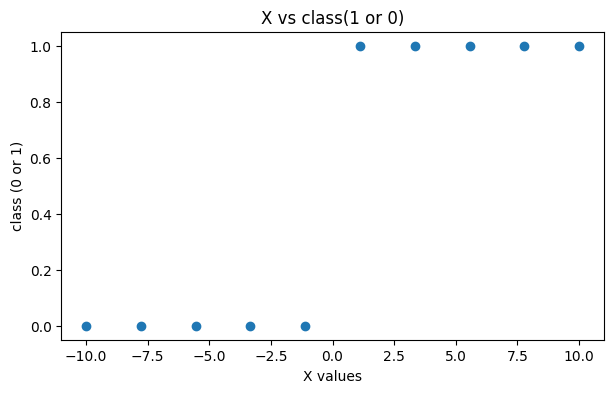

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# creating random data points
x =  np.linspace(-10, 10, 10)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
plt.figure(figsize=(7, 4), dpi=100)
plt.title('X vs class(1 or 0)')
plt.xlabel('X values')
plt.ylabel('class (0 or 1)')
plt.scatter(x, y)
plt.savefig('logistic_regression.jpg')
plt.show()

>Intuition from the plot:

 $f(x)=\begin{cases} 0&\quad x<0\\ 1&;\quad x\geq 0\end{cases}$

## Linear Regression


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[0 0 0 0 0 1 1 1 1 1]
[-0.18181818 -0.03030303  0.12121212  0.27272727  0.42424242  0.57575758
  0.72727273  0.87878788  1.03030303  1.18181818]


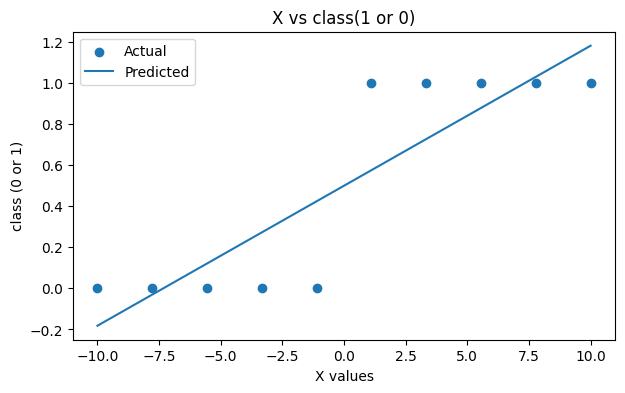

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
pred = lr.predict(x.reshape(-1,1))
print(y, pred, sep='\n')
plt.figure(figsize=(7, 4), dpi=100)
plt.title('X vs class(1 or 0)')
plt.xlabel('X values')
plt.ylabel('class (0 or 1)')
plt.scatter(x, y, label="Actual")
plt.plot(x, pred, label="Predicted")
plt.legend(loc='upper left')
plt.savefig('logistic_regression_1.jpg')
plt.show()

## Statistical apprach to linear regression

In [3]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.379
Model:                            OLS   Adj. R-squared (uncentered):              0.310
Method:                 Least Squares   F-statistic:                              5.488
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                      0.0438
Time:                        22:22:55   Log-Likelihood:                         -8.3432
No. Observations:                  10   AIC:                                      18.69
Df Residuals:                       9   BIC:                                      18.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


So the Mathematical model for the linear regression is:

$$y=0.682 x+0.029$$

In [5]:
y_p=0.682*x+0.029
print(y_p)

[-6.791      -5.27544444 -3.75988889 -2.24433333 -0.72877778  0.78677778
  2.30233333  3.81788889  5.33344444  6.849     ]


## Disadvantages of Linear Regression over Logistic regression or classification problem:

- The error rate is very high.
- very sensitive to outliers.
- most of the time we will get predicted values that are greater than 1 and less than 0.

## Linear regression is sensitive to outliers

[0 0 0 0 0 1 1 1 1 1 1]
[0.27135678 0.31323283 0.35510888 0.39698492 0.43886097 0.48073702
 0.52261307 0.56448911 0.60636516 0.64824121 1.40201005]


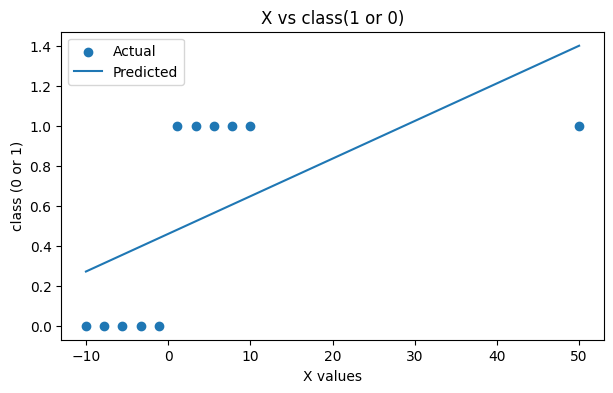

In [6]:
# creating data random points
x1 = np.append(x, 50)
y1 = np.append(y, 1)

lr = LinearRegression()
lr.fit(x1.reshape(-1,1), y1)
predu = lr.predict(x1.reshape(-1,1))

print(y1, predu, sep='\n')

plt.figure(figsize=(7, 4), dpi=100)
plt.title('X vs class(1 or 0)')
plt.xlabel('X values')
plt.ylabel('class (0 or 1)')

plt.scatter(x1, y1, label="Actual")
plt.plot(x1, predu, label="Predicted")
# plt.plot([0, 100, 100], [0.5, 0.5, 0], linestyle='-')

plt.legend()
plt.savefig('logistic_regression_12.jpg')
plt.show()

## Intuition behind the logistic regression

The logistic regression transform a linear predicted line to a sigmoid form:
$$h_\theta(x)=\dfrac{1}{1+e^{-\theta^TX}}$$
Where $\theta^T x$ is the linear expression $mx+c$

In [7]:
def sigmoid(x, theta=1):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-np.dot(x, theta)))


In [8]:
y_pred = sigmoid(x, 1)
y_pred

array([4.53978687e-05, 4.18766684e-04, 3.85103236e-03, 3.44451957e-02,
       2.47663801e-01, 7.52336199e-01, 9.65554804e-01, 9.96148968e-01,
       9.99581233e-01, 9.99954602e-01])

In [9]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
pred

array([-0.18181818, -0.03030303,  0.12121212,  0.27272727,  0.42424242,
        0.57575758,  0.72727273,  0.87878788,  1.03030303,  1.18181818])

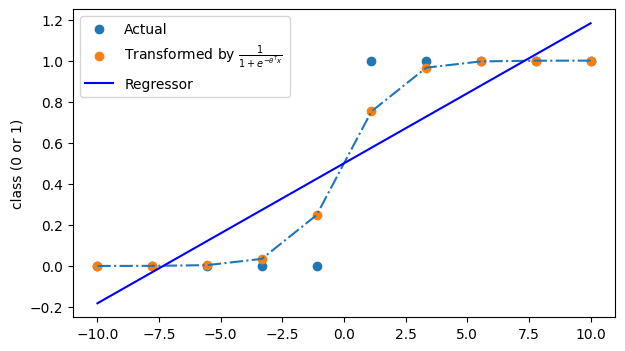

In [11]:
plt.figure(figsize=(7, 4), dpi=100)
plt.ylabel('class (0 or 1)')
plt.scatter(x, y, label="Actual")
plt.scatter(x, y_pred, label=r'Transformed by $\frac{1}{1+e^{-\theta^Tx}}$ ')
plt.plot(x, y_pred, linestyle='-.')
plt.plot(x, pred,label="Regressor",color='b')
plt.legend()
plt.savefig('logistic_regression_12.jpg')
plt.show()

## Cost Function:
>Cost Function is used to check the error between actual and predicted values.
but we don’t use the MSE function in logistic regression.

$$J(h_\theta(x))=-\frac{1}{m}\sum \left[y^i\log(h_\theta(x^i))+(1-y^i)\log(1-h_\theta(x^i))\right]$$

In [12]:
def cost_function(x, y, t): # t= theta value
    # Computes the cost function for all the training samples
    m = len(x)
    total_cost = -(1 / m) * np.sum(
        y * np.log(sigmoid(x, t)) +
        (1 - y) * np.log(1 - sigmoid(x, t)))
    return total_cost

## Plot of cost function over $\theta$.

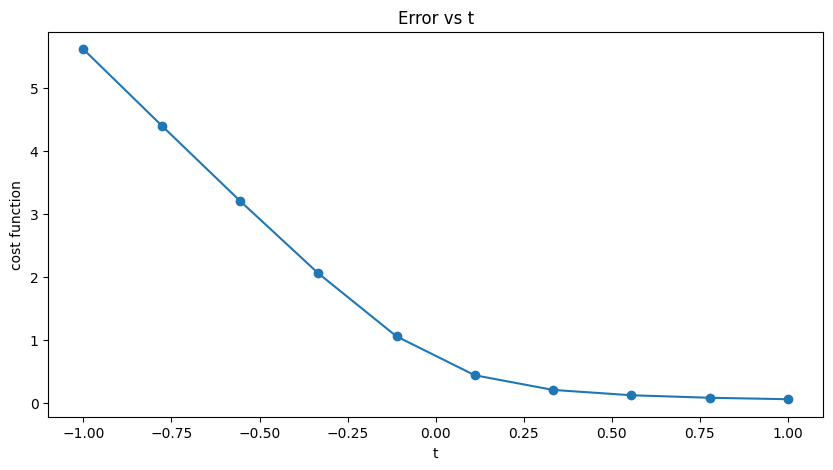

In [13]:
# ploting graph for diffrent values of m vs cost function
plt.figure(figsize=(10,5))
T = np.linspace(-1, 1,10)
error = []
i= 0
for t in T:

    error.append(cost_function(x,y, t))
    #print(f'for t = {t} error is {error[i]}')
    i+=1
plt.plot(T, error)
plt.scatter(T, error)
plt.ylabel("cost function")
plt.xlabel("t")
plt.title("Error vs t")
plt.savefig('costfunc.jpg')
plt.show()

##`python` implementation

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x.reshape(-1,1), y)
pred = lr.predict(x.reshape(-1,1))
prob = lr.predict_proba(x.reshape(-1,1))
print(y, np.round(np.array(pred), 2), sep='\n')

[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1]


In [15]:
prob

array([[9.99913803e-01, 8.61968974e-05],
       [9.99310641e-01, 6.89358833e-04],
       [9.94510033e-01, 5.48996737e-03],
       [9.57693892e-01, 4.23061081e-02],
       [7.38824068e-01, 2.61175932e-01],
       [2.61175932e-01, 7.38824068e-01],
       [4.23061081e-02, 9.57693892e-01],
       [5.48996737e-03, 9.94510033e-01],
       [6.89358833e-04, 9.99310641e-01],
       [8.61968974e-05, 9.99913803e-01]])

In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, pred)
cnf_matrix

array([[5, 0],
       [0, 5]])

## Visualizing Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

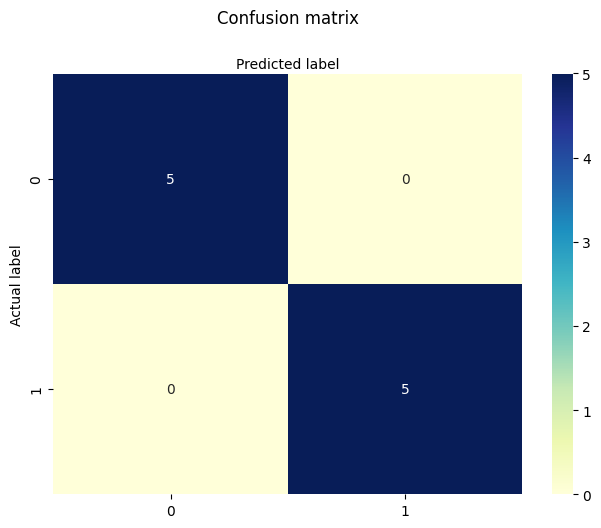

In [17]:
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
from scipy.interpolate import make_interp_spline

B_spline_coeff = make_interp_spline(x, pred)
X_Final = np.linspace(x.min(), x.max(), 500)
Y_Final = B_spline_coeff(X_Final)


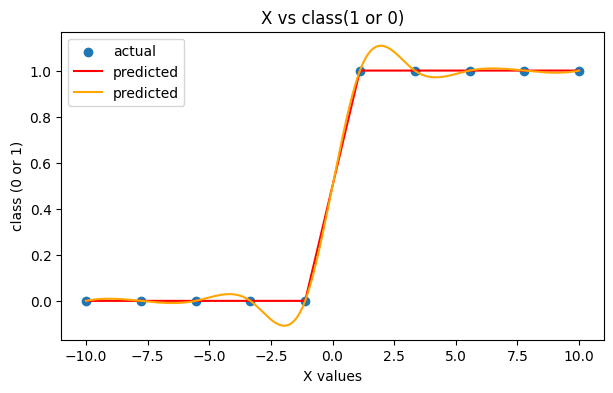

In [19]:
plt.figure(figsize=(7, 4), dpi=100)
plt.title('X vs class(1 or 0)')
plt.xlabel('X values')
plt.ylabel('class (0 or 1)')

plt.scatter(x, y, label="actual")
plt.plot(x, pred, label="predicted", color='red')
plt.plot(X_Final, Y_Final, label="predicted", color='orange')
plt.legend(loc='upper left')
plt.savefig('logistic_regression.jpg')
plt.show()